In [2]:
import sys
import os
import json
import requests
import wget  # requires pip install wget
import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [4]:
os.system('mv entries entries.bck')
url='https://lsd.univ-lille.fr/api/entries'
#r = requests.get(url, allow_redirects=True)
#open('facebook.ico', 'wb').write(r.content)
downloadedfilename=wget.download(url)

-1 / unknown

In [5]:
f = open(downloadedfilename)
data=json.load(f)

### GET CATALOG

In [8]:
url='https://lsd.univ-lille.fr/api/cat?tag='
for i in data:
    fullurl = '%s%s' %(url,i.get('tag'))
    print (fullurl)
    downloadedfilename = wget.download(fullurl)
    with zipfile.ZipFile(downloadedfilename, 'r') as zip_ref:
        zip_ref.extractall('./catalog')
    

https://lsd.univ-lille.fr/api/cat?tag=76801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=57804
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=58802
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=58803
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=58801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=60802
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=81801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=31803
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=31804
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=56801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=57803
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=45803
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=45802
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=57801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=57802
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=61801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=60801
-1 / unknownhttps://lsd.univ-lille.fr/api/cat?tag=47801
-1 /

### Rename cat files and Generate Partition Function File

76801
57804
58802
58803
58801
60802
81801
31803
31804
56801
57803
45803
45802
57801
57802
61801
60801
47801
47802
66802
66801


/tmp/ipykernel_493371/1669040110.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[5,10])


59802
59801
45801
73804
73803
73802
73801
44801
31801
32802
32801
31802


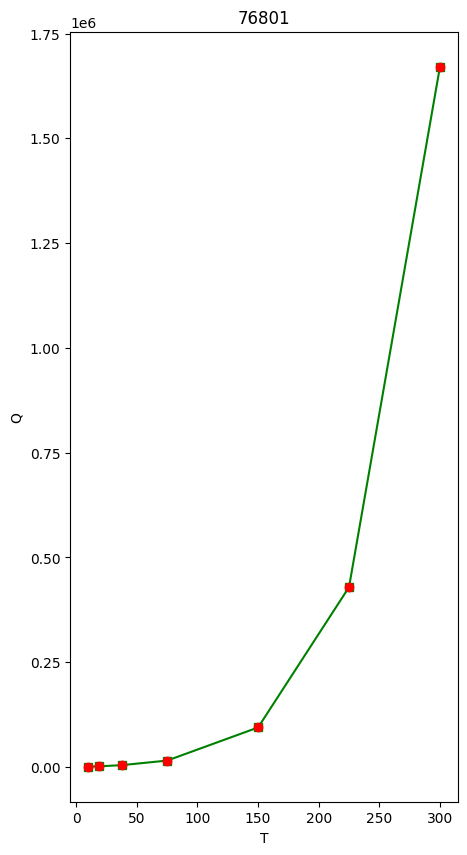

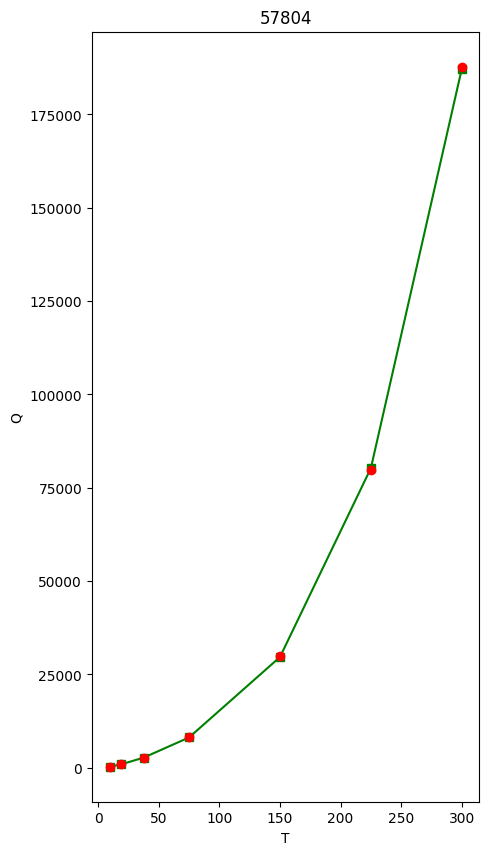

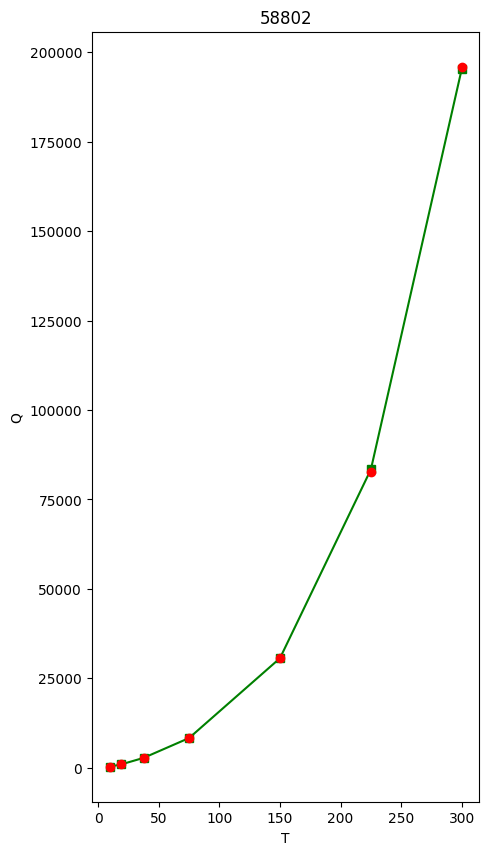

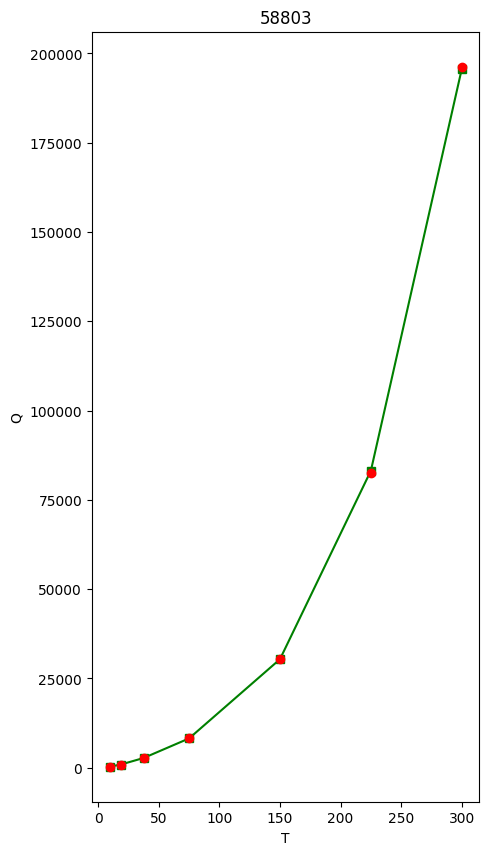

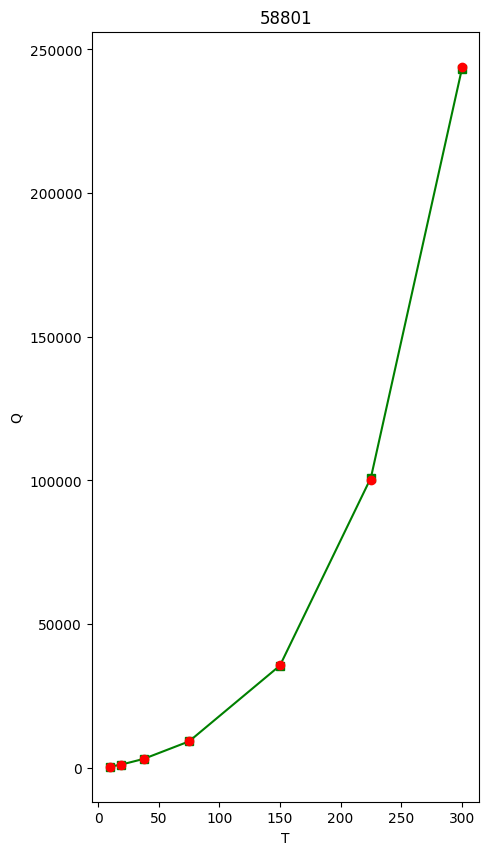

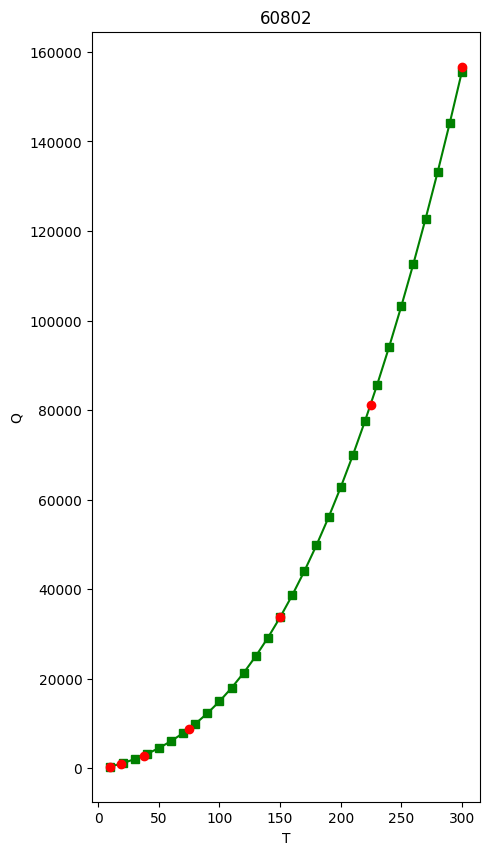

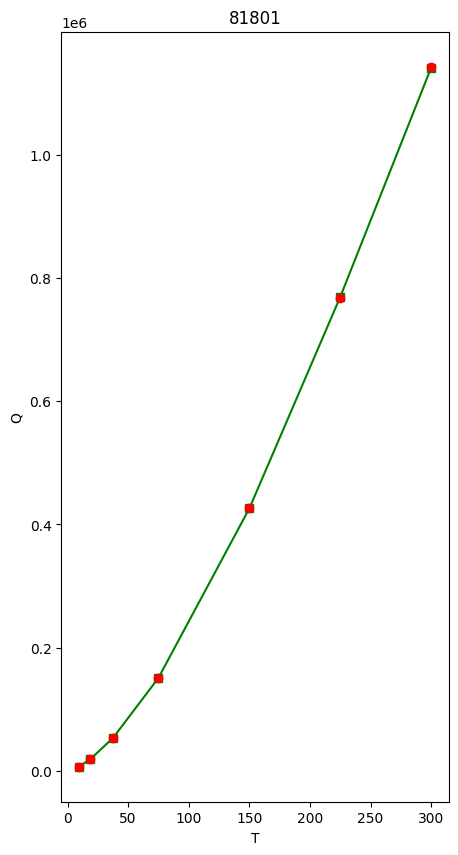

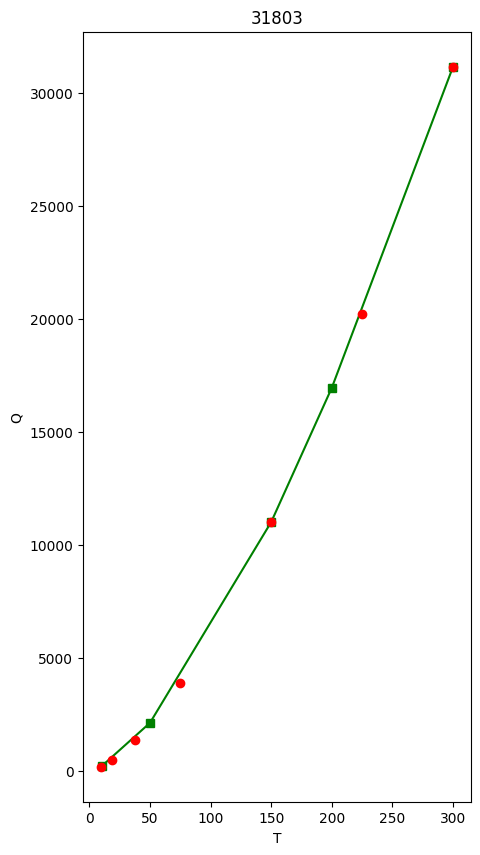

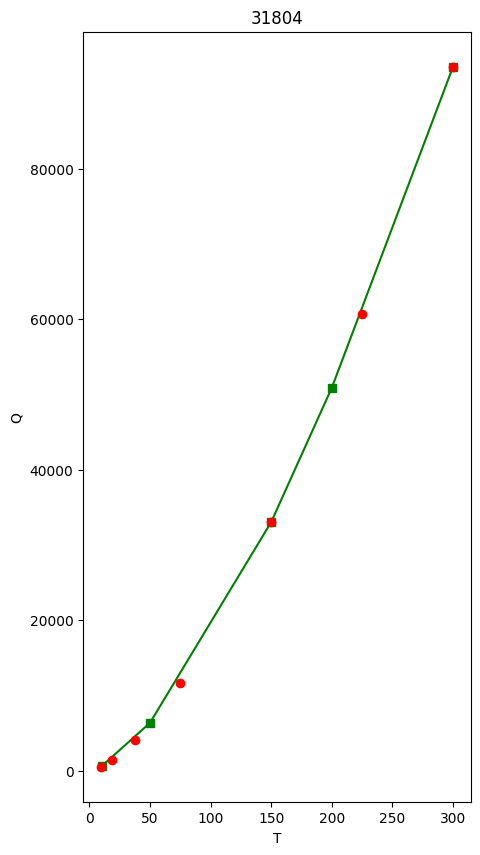

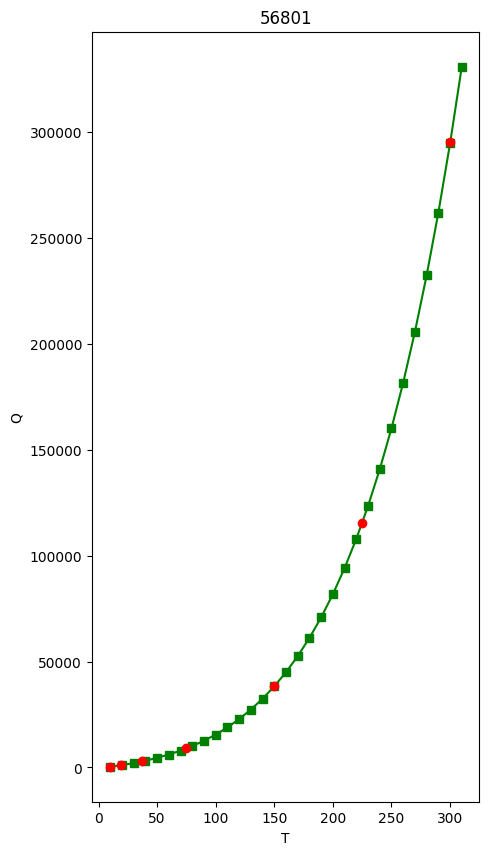

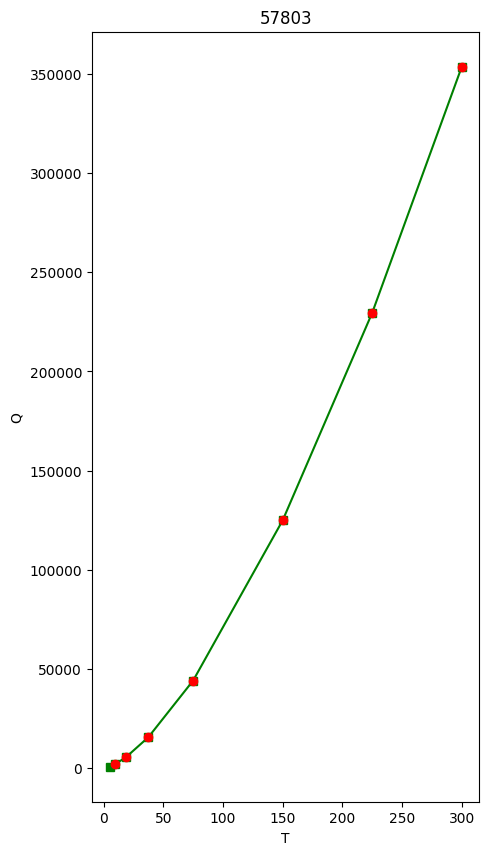

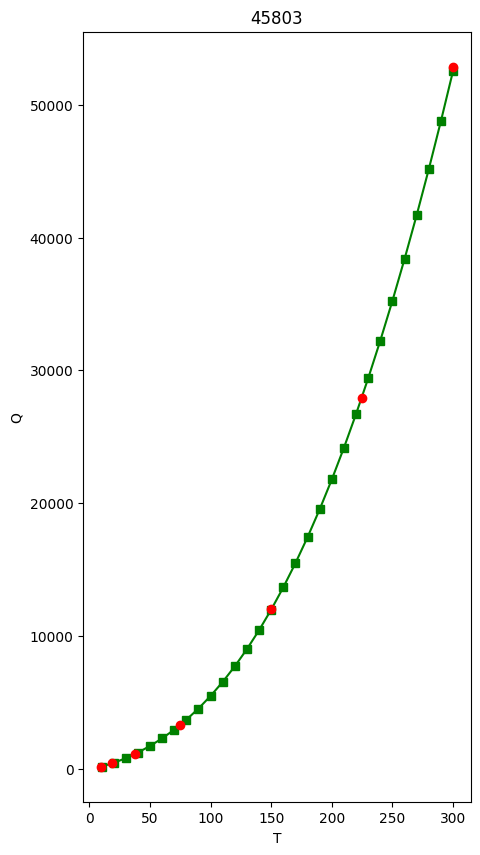

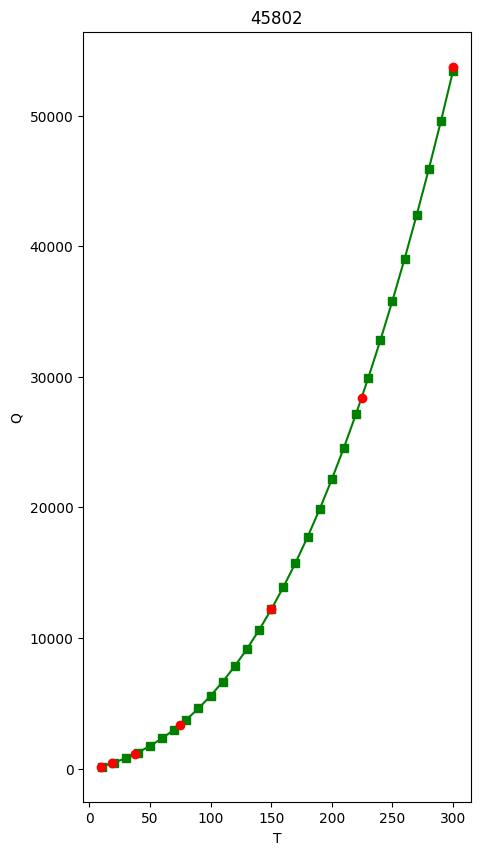

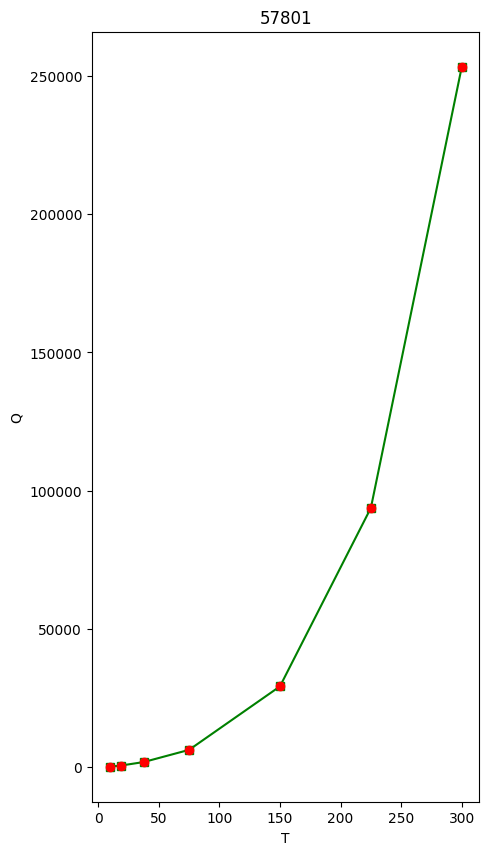

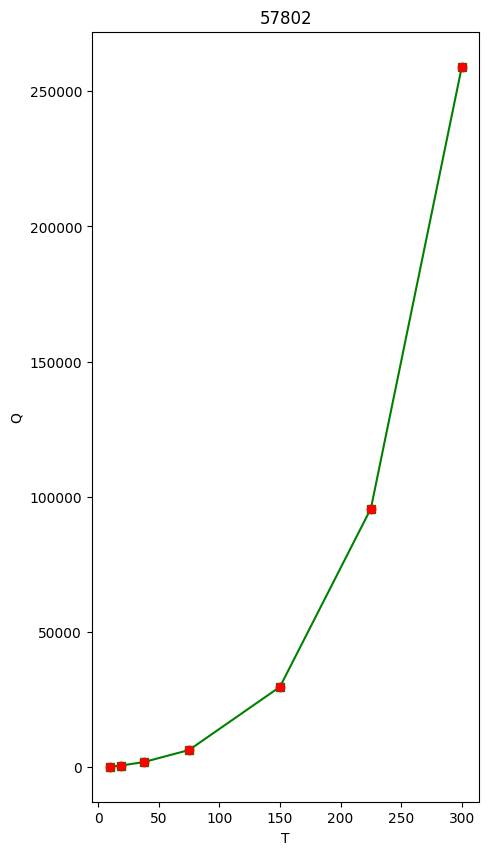

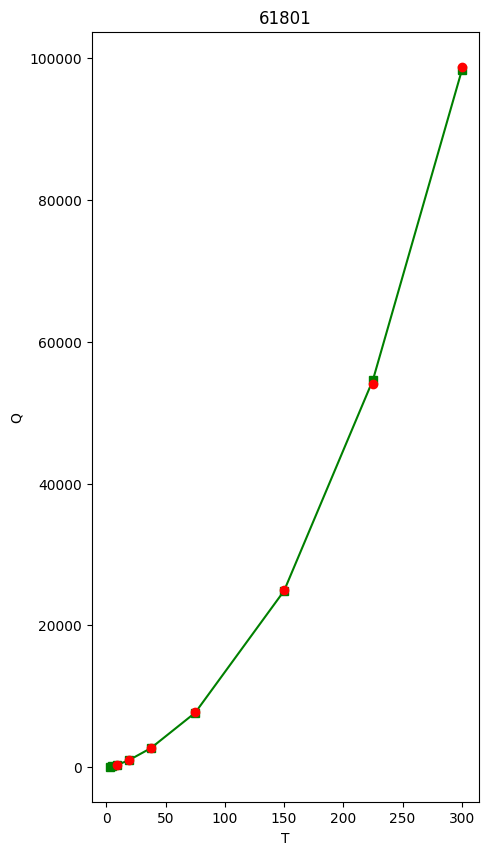

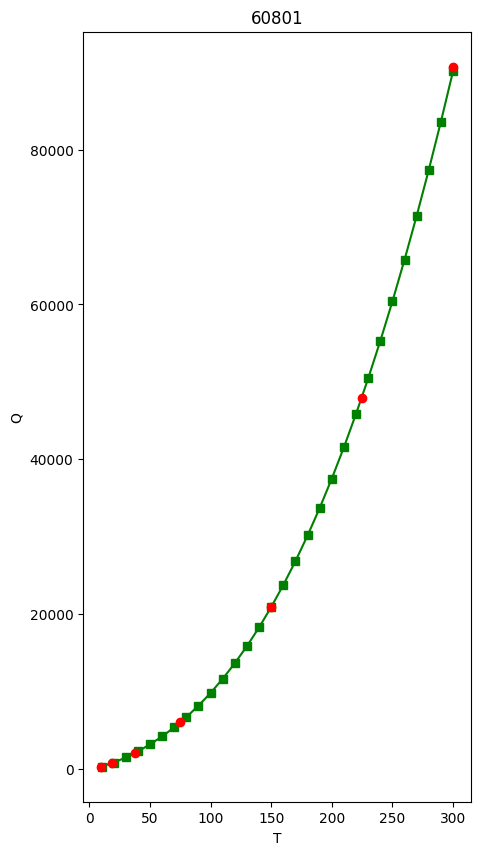

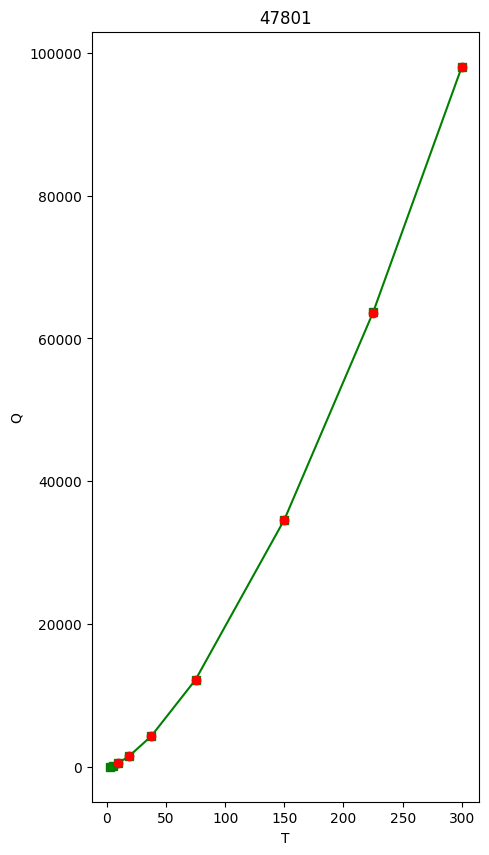

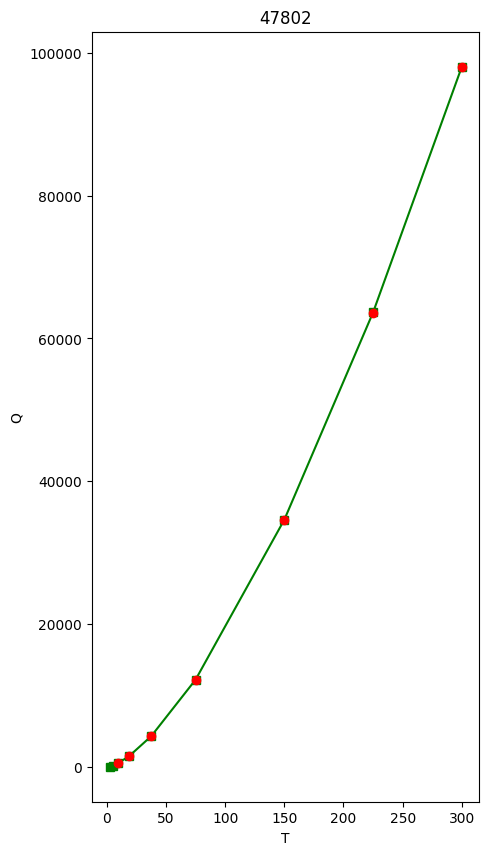

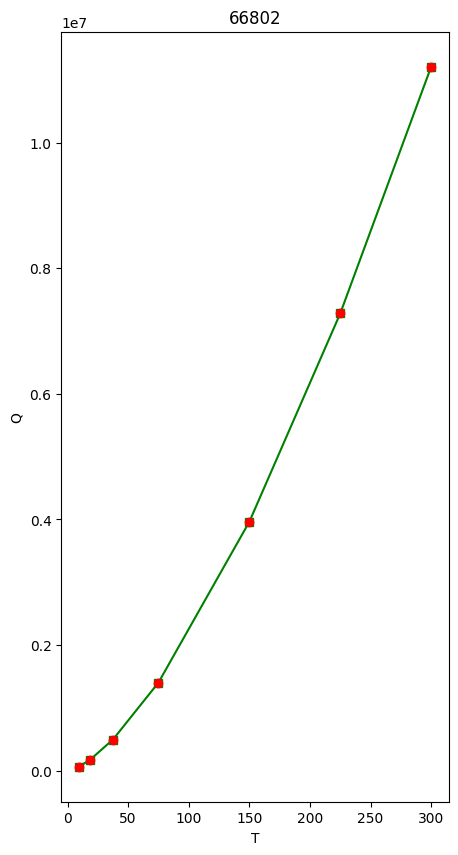

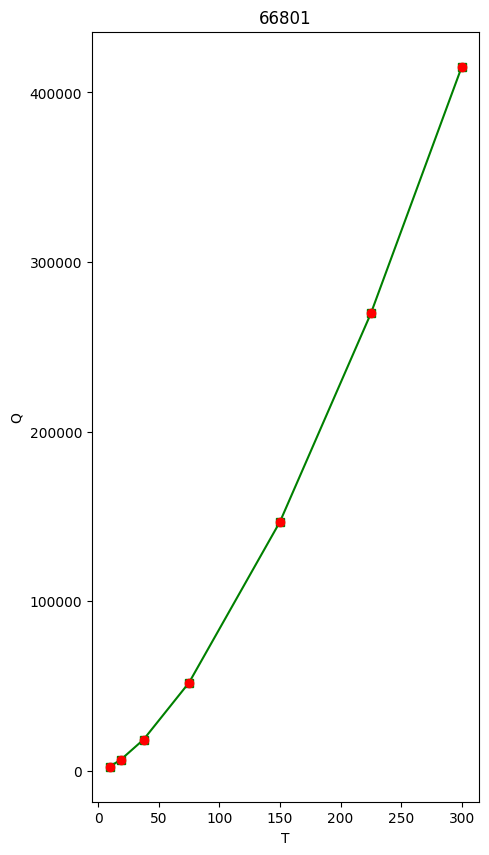

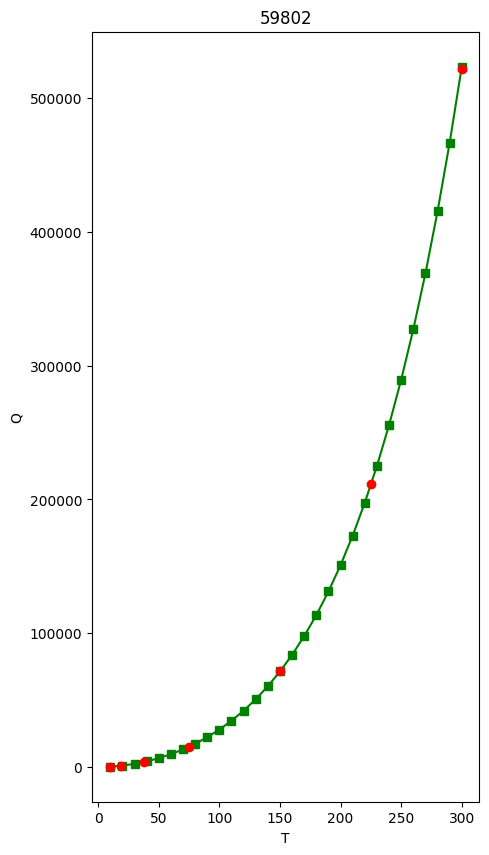

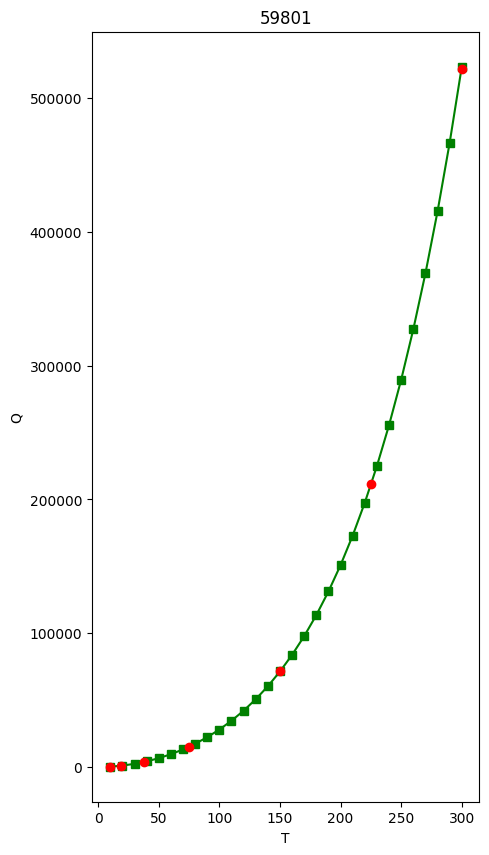

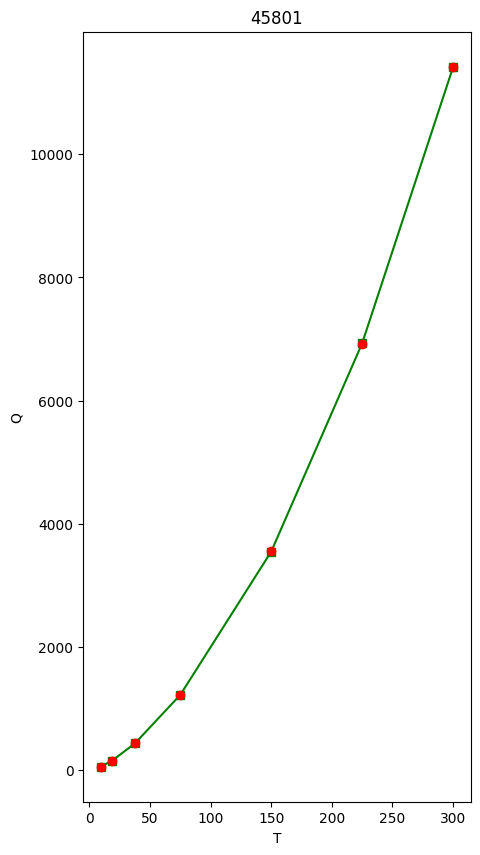

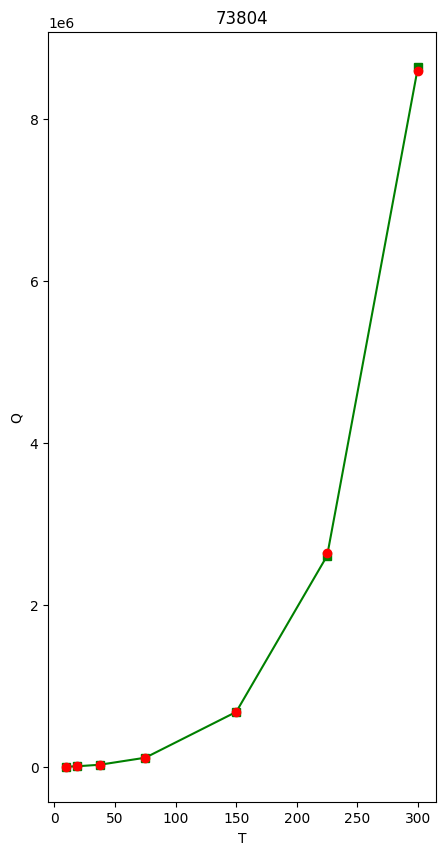

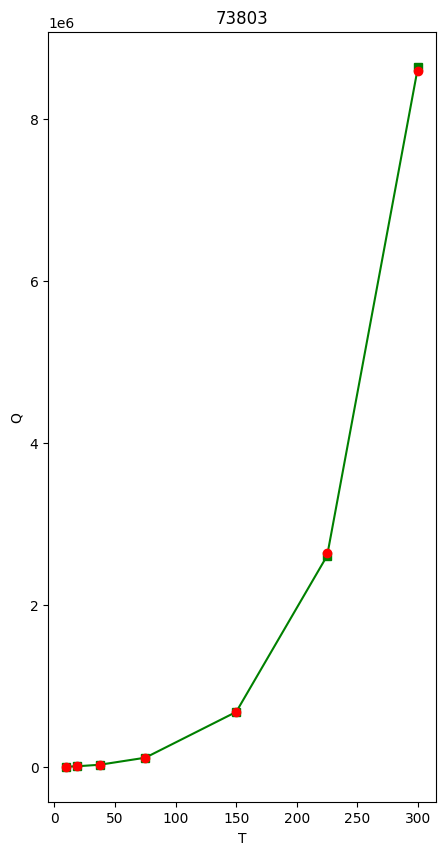

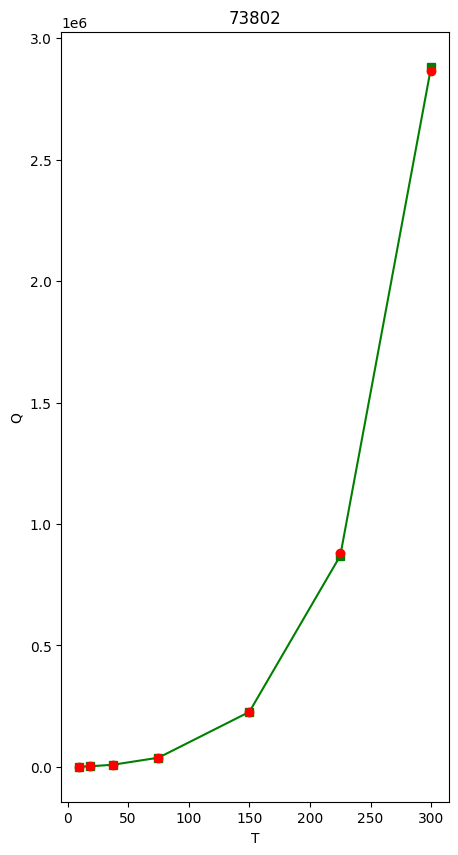

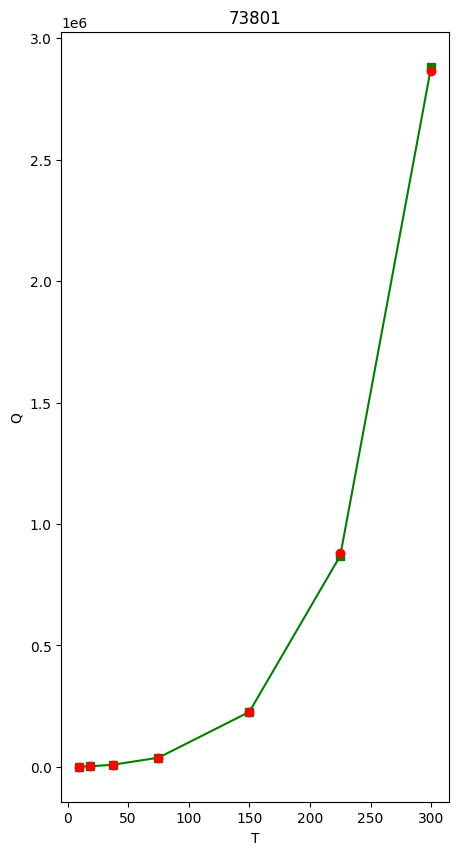

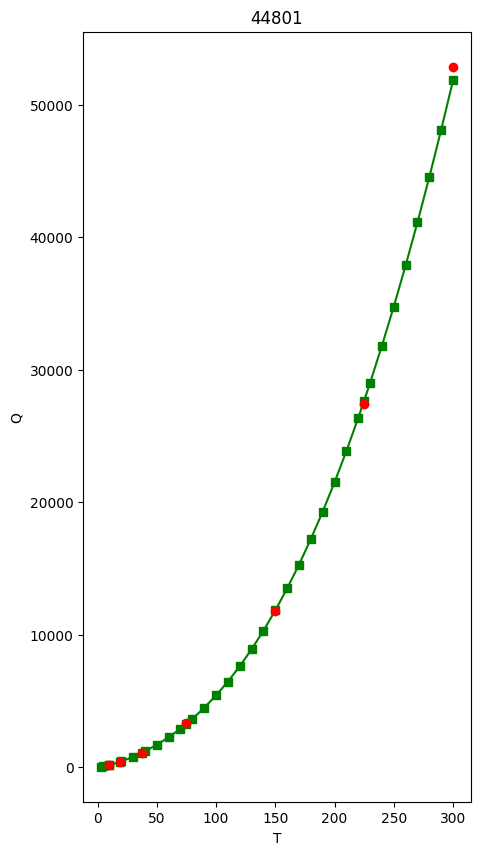

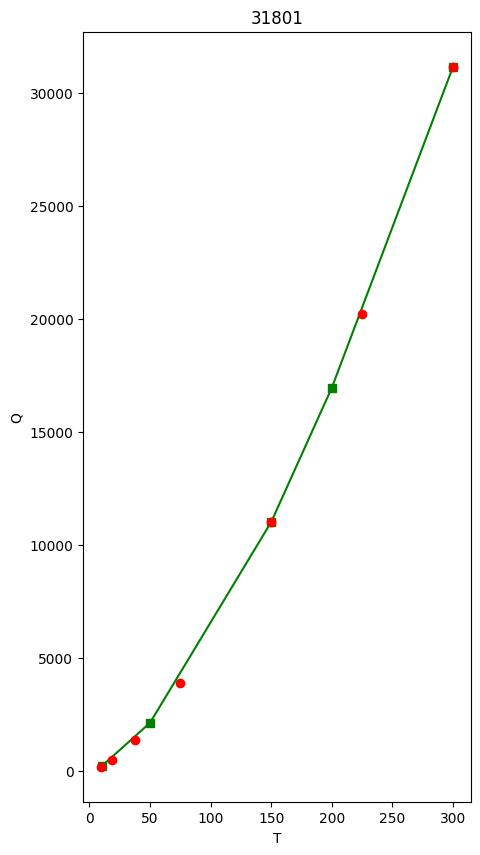

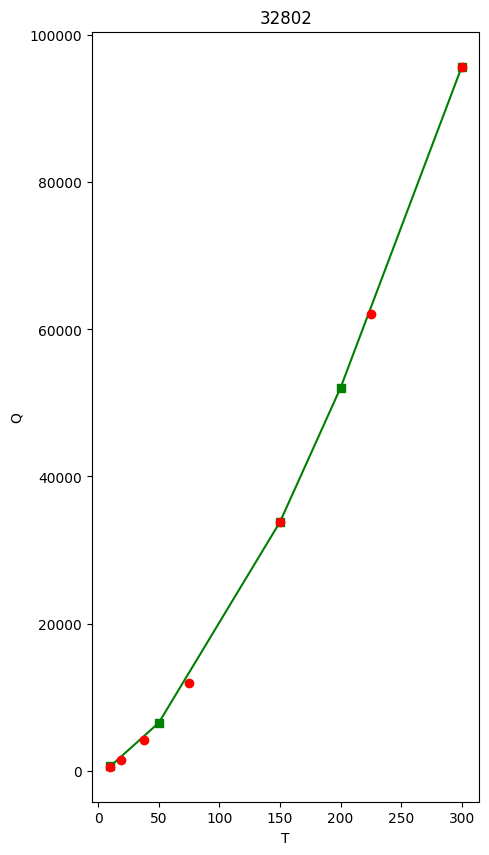

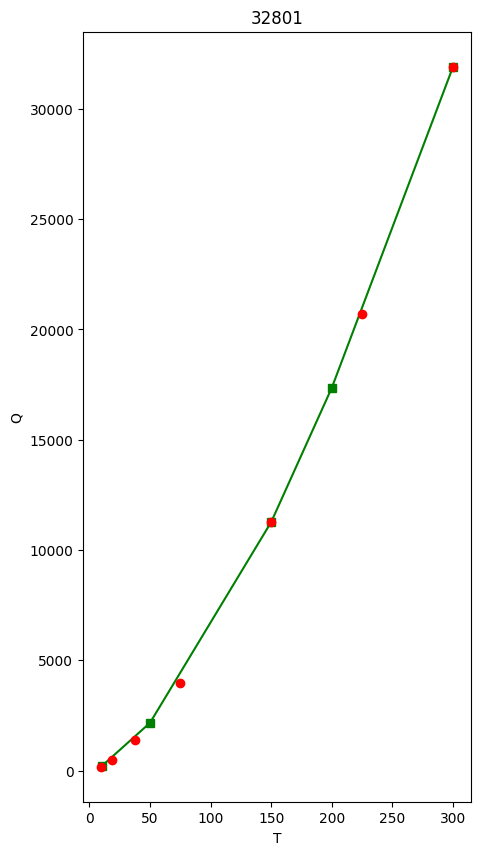

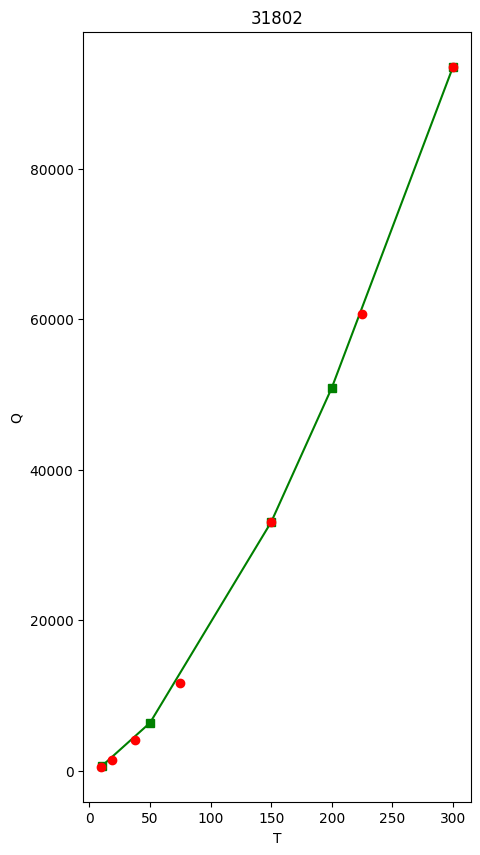

In [9]:
x_new=np.array([300.0,225.0,150.0,75.0,37.5,18.75,9.375])
x_new=np.log10(x_new)

partfile = open("partition_function.html","w")
for i in data:
    numberofdashes=0
    x = []
    y = []
    tag = str(i.get('tag'))
    moleculename = str(i.get('condensed_formula'))+str(i.get('descriptor')).replace(" ","")
    print(tag)
    os.system('mv catalog/%s.cat catalog/c0%s.cat' %(tag,tag))
    with open('catalog/readme_%s.txt' %tag) as f:
        for lines in f.readlines():
            if "---" in lines:
                numberofdashes+=1
                #print(numberofdashes)
            elif numberofdashes == 2:
                # print(lines)
                formattedarray = lines.replace('\n', '').replace(" ","").split('|')
                x =np.append(x,formattedarray[0])
                y =np.append(y,formattedarray[1])
    x = np.log10(x.astype(float))
    y = np.log10(y.astype(float))    
    fit = np.polyfit(x, y ,4)
    line = np.poly1d(fit)
    y_new = line(x_new)
    #fig = plt.gcf()
    #fig.set_size_inches(fig.get_size_inches()*3)
    plt.figure(figsize=[5,10])
    plt.plot(x, y, "sg-", x_new, y_new, "or");
    plt.xlabel("log10(T)")
    plt.ylabel("log10(Q)")
    plt.title("%s" %tag)
    plt.savefig('catalog/c0%s_part_log.png' %tag)
    #print(10**y_new)
    #print((10**y_new-10**y)/10**y*100)
    plt.gcf().clear()
    plt.plot(10**x, 10**y, "sg-", 10**x_new, 10**y_new, "or");
    plt.xlabel("T")
    plt.ylabel("Q")
    plt.title("%s" %tag)
    plt.savefig('catalog/c0%s_part_lin.png' %tag)

    partfile.write("%s %s" %(tag.rjust(6),moleculename.ljust(57)))
    for q in y_new:
        partfile.write("%13.4f" %q)
    partfile.write("%s\n" %"".ljust(26))
partfile.close()